### Exercicis 1 i 2

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pandas as pd

#### Importar la bnase de dades simplificada

In [13]:
df = pd.read_csv('dbsimple.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Unnamed: 0     int64  
 1   Year           int64  
 2   Month          int64  
 3   DayofMonth     int64  
 4   UniqueCarrier  object 
 5   ArrDelay       float64
 6   DepDelay       float64
 7   AirTime        float64
 8   Origin         object 
 9   Dest           object 
 10  ArrDelay5      float64
 11  DepDelay5      float64
dtypes: float64(5), int64(4), object(3)
memory usage: 177.3+ MB


#### Gràfica de barres mostrant número de vols per companyia aèria

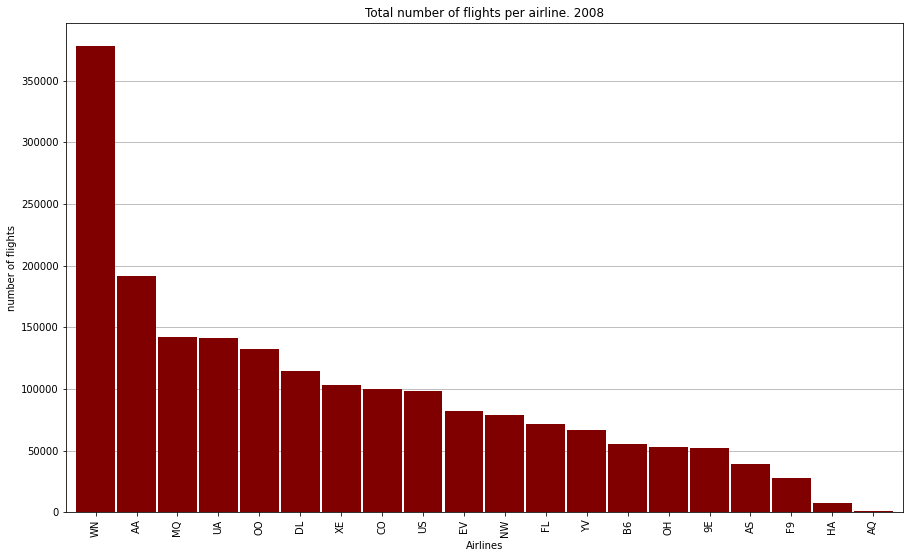

In [3]:
plt.figure(figsize=(15,9))
df.UniqueCarrier.value_counts().plot.bar(color ='maroon', width = 0.95, zorder= 2)
plt.grid(True, color ='grey', linestyle ='-', linewidth = 0.5,axis='y')

plt.title('Total number of flights per airline. 2008')
plt.xlabel('Airlines')
plt.ylabel('number of flights')

plt.savefig('vols_companyia.jpg', dpi = 150)

#### Agrupar els valors més baixos en una variable 'others' per mostrar un <i>pie</i> menys saturat

In [5]:
carrier=df.UniqueCarrier.value_counts()

In [6]:
tot=0
n=carrier.iloc[14]
for index, value in carrier.items():
    if value < n:
        tot=tot + value
        carrier = carrier.drop(index)
s3 = pd.Series([tot], index=['others'])
carrier=carrier.append(s3)
carrier1=pd.Series(carrier)
carrier1

WN        377602
AA        191865
MQ        141920
UA        141426
OO        132433
DL        114238
XE        103663
CO        100195
US         98425
EV         81877
NW         79108
FL         71284
YV         67063
B6         55315
OH         52657
others    127687
dtype: int64

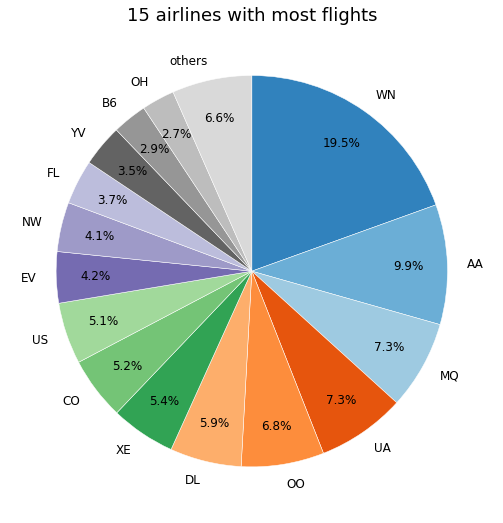

In [68]:
plt.figure(figsize=(15,9))
ax = carrier1.plot(kind='pie', colormap='tab20c', fontsize=12, title='Top 15 carriers', ylabel='',startangle=90,
                   autopct='%1.1f%%', pctdistance=0.8, counterclock=False,
                   wedgeprops={'linewidth': 0.5, 'edgecolor': 'white'},)
ax.set_title('15 airlines with most flights', fontsize=18)
ax

plt.savefig('pie.jpg', dpi = 150)

#### Intent de crear un sunburst, primer separant si hi ha retràs, després especificant temps de retràs (que he agrupat per intervals per simplificar les dades)

In [7]:
arrdel=df.ArrDelay.value_counts()
arrdel

neg,nodel,m0,m5,m10,m15,m30,m60,m120,m360,m720,m1440= 0,0 , 0 , 0, 0 , 0, 0 , 0, 0 , 0, 0 , 0
for index, value in arrdel.items():
    if index < 0:
        neg = neg + value
    elif index == 0:
        nodel=nodel+value
    elif index > 1440:
        m1440 = m1440 + value
    elif index > 720:
        m720 = m720 + value
    elif index > 360:
        m360 = m360 + value
    elif index > 120:
        m120 = m120 + value
    elif index > 60:
        m60 = m60 + value
    elif index > 30:
        m30 = m30 + value
    elif index > 15:
        m15 = m15 + value
    elif index > 10:
        m10 = m10 + value      
    elif index > 5:
        m5 = m5 + value
    else:
        m0=m0+value
        
        
delayed=m0+m5+m10+m15+m30+m60+m120+m360+m720+m1440        
total=neg+nodel+delayed       
        
print(neg,nodel,m0,m5,m10,m15,m30,m60,m120,m360,m720,m1440,'delayed',delayed,'total',total)

177916 27040 158592 179366 170445 384532 391305 287215 146777 4560 613 10 delayed 1723415 total 1928371


In [8]:
import plotly.express as px

In [9]:
df = pd.DataFrame([
    ['delayed', 0, 'Total'],['CRSdelay', 0, 'Total'], ['Early arrival', neg, 'Total'],['OnTime', nodel, 'Total'],
    
    ['+5m', m5, 'CRSdelay'],['+0m', m0, 'CRSdelay'],  ['+10m', m10, 'CRSdelay'],
    ['+15m', m15, 'delayed'],
    ['+30m', m30, 'delayed'], ['+1hr', m60, 'delayed'],
    ['+2hr', m120, 'delayed'], ['+6hr', m360, 'delayed'],
    ['+12hr', m720, 'delayed'], ['+1day', m1440, 'delayed']],
    
    columns=['time', 'total', 'Arrivals'])

fig = px.sunburst(df, 
                  names='time', 
                  values='total', 
                  parents='Arrivals', 
                  title='Arrivals delays',                
                 )
fig.update_layout(margin = dict(t=50, l=10, r=10, b=10))



fig.show()

fig.write_image("fig1.jpeg")

#### Boxplot comparant retrassos en sortida i en arribada. Com hi ha  moltíssims outlyers es fa difícil veure la comparativa per aerolínia, per això he augmentat la visió de les mitjanes... 

In [10]:
import seaborn as sns

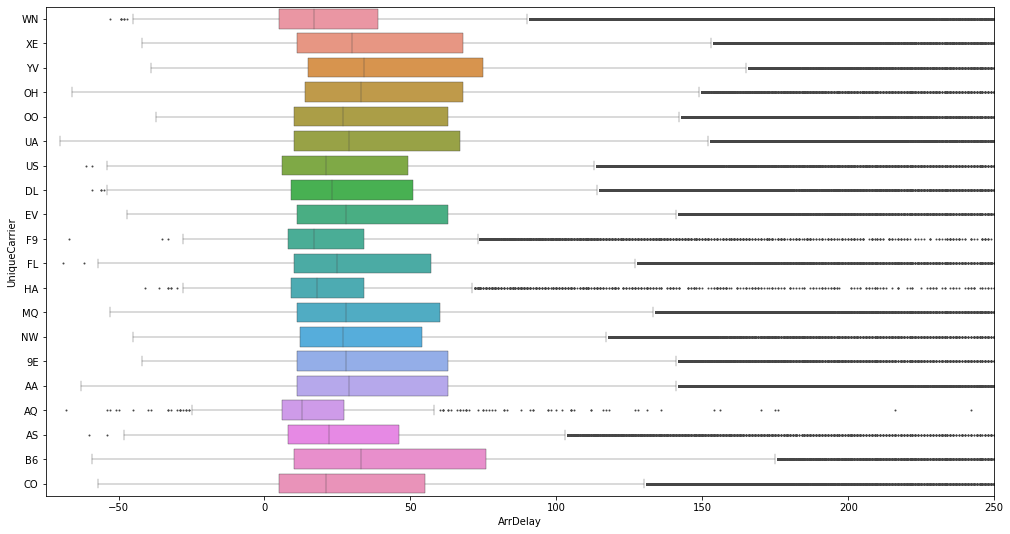

In [19]:
plt.figure(figsize=(17,9))


#showfliers=False
#sns.stripplot(y='UniqueCarrier', x='ArrDelay', data=df,size=1)
sns.boxplot(y='UniqueCarrier', x='ArrDelay', data=df, linewidth=0.4,
            flierprops = dict( markersize = 2, markeredgecolor='none',marker='o'))
plt.xlim(-75, 250)

plt.savefig('boxplot.jpg', dpi = 150)

#### En la gràfica de violins es veu la quantitat dels outlyers 

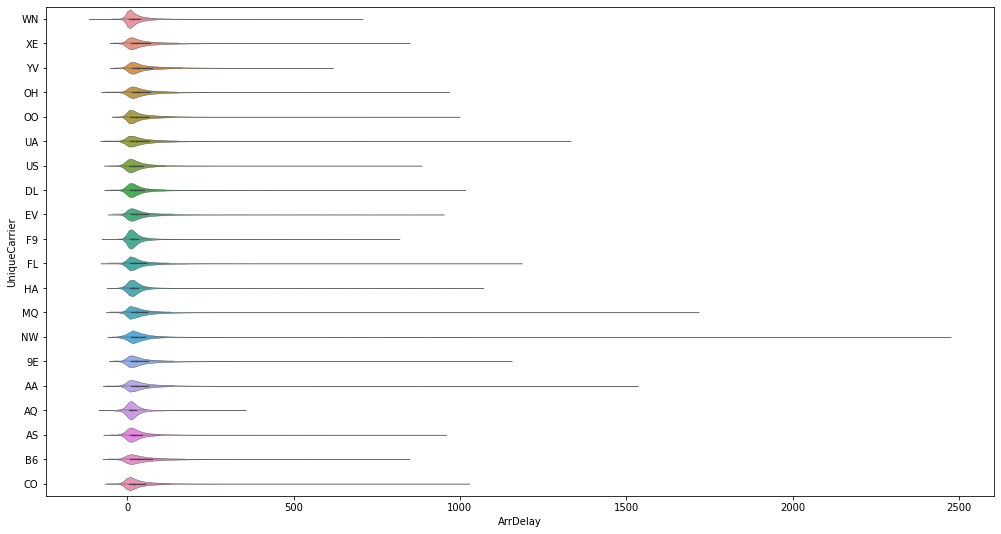

In [20]:
plt.figure(figsize=(17,9))


#showfliers=False
#sns.stripplot(y='UniqueCarrier', x='ArrDelay', data=df,size=3)
sns.violinplot(y='UniqueCarrier', x='ArrDelay', data=df, linewidth=0.4)

plt.savefig('violin.jpg', dpi = 150)

#### A l'scatter plot es veu que tants minuts de retàs a la sortida la majoria de vegades coincidexen a l'arribada. 

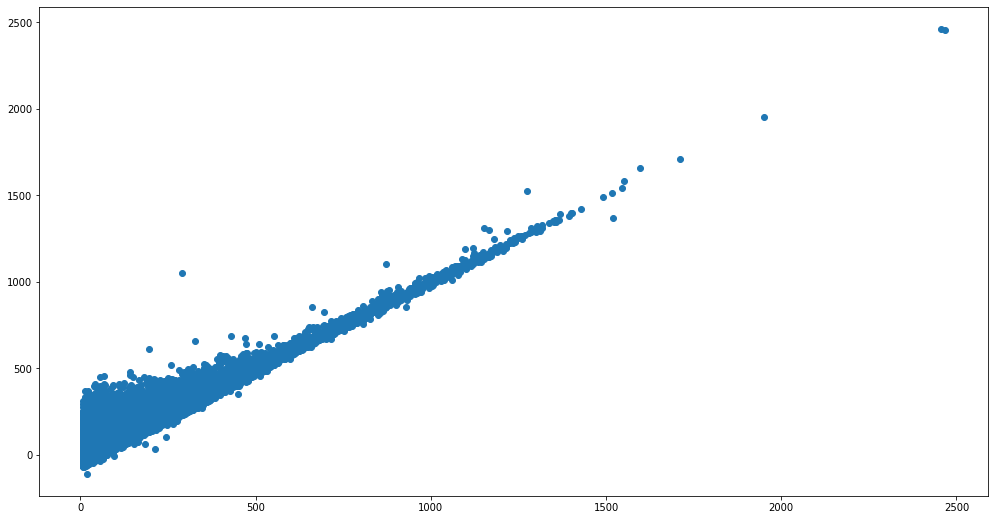

In [18]:
plt.figure(figsize=(17,9))

plt.scatter(df.DepDelay , df.ArrDelay)


#### Un intent amb 'sampling' de la base de dades

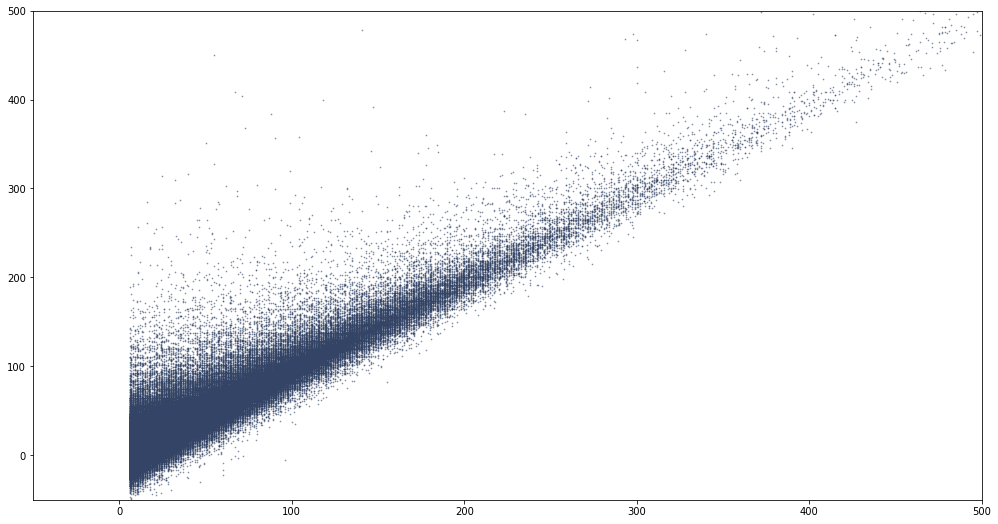

In [65]:
df_25 = df.sample(frac=0.15)

plt.figure(figsize=(17,9))
plt.xlim(-50, 500)
plt.ylim(-50, 500)

plt.scatter(df_25.DepDelay , df_25.ArrDelay, s=0.5, alpha=0.5, c='#334466')


#### he simplificat la columna de retrassos d'arribades i sorites a intervals de 5 minuts però no millora

Text(0, 0.5, "Retràs en l'arribada")

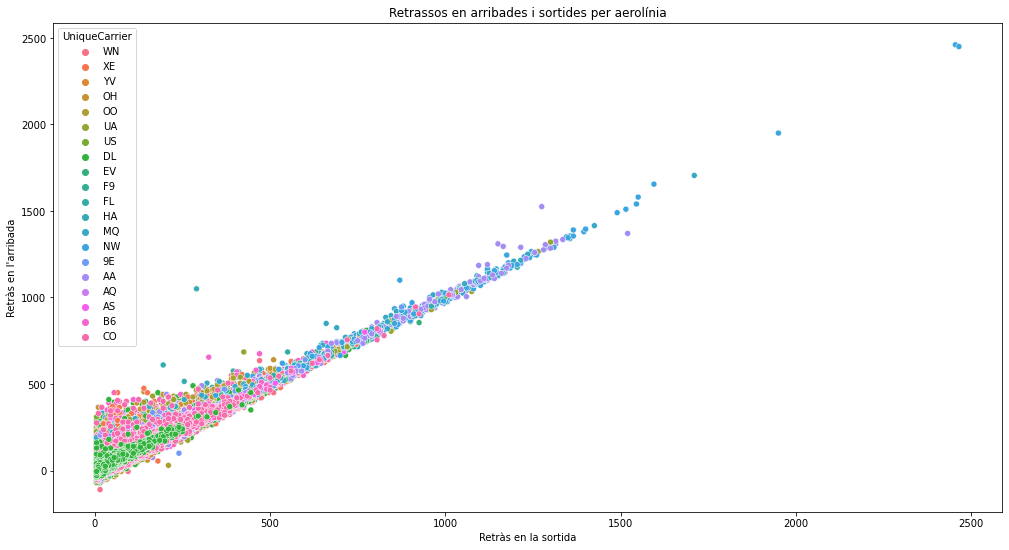

In [63]:
plt.figure(figsize=(17,9))
sns.scatterplot(y='ArrDelay5', x='DepDelay5', hue='UniqueCarrier', data=df)

plt.title('Retrassos en arribades i sortides per aerolínia')
plt.xlabel('Retràs en la sortida')
plt.ylabel('Retràs en l\'arribada')

#plt.savefig('scatter1.jpg', dpi = 150)

#### Com l'anterior amb sampling reduït i afegint la durada del vol

In [21]:
plt.figure(figsize=(17,17))
sns.scatterplot(data=df_25, x="DepDelay5", y="ArrDelay5", size="AirTime", hue='UniqueCarrier', sizes=(2, 200))


plt.savefig('scatter2.jpg', dpi = 150)

NameError: name 'df_25' is not defined

<Figure size 1224x1224 with 0 Axes>